In [2]:
import numpy as np
import keras
import keras.datasets.mnist
import time

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from keras.layers import Dense, Flatten


(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,) 

print("Sizes...")
print((x_train.shape,y_train.shape))
print((x_test.shape,y_test.shape))

Sizes...
((60000, 28, 28), (60000,))
((10000, 28, 28), (10000,))


In [2]:
# Convert y_train into one-hot format
# !!! Run only once
temp = []
for i in range(len(y_train)):
    temp.append(to_categorical(y_train[i], num_classes=10))
y_train = np.array(temp)
# Convert y_test into one-hot format
temp = []
for i in range(len(y_test)):    
    temp.append(to_categorical(y_test[i], num_classes=10))
y_test = np.array(temp)

In [3]:
print("Sizes...")
print((x_train.shape,y_train.shape))
print((x_test.shape,y_test.shape))

Sizes...
((60000, 28, 28), (60000, 10))
((10000, 28, 28), (10000, 10))


In [4]:
n=1000
model4 = Sequential()
model4.add(Flatten(input_shape=(28,28)))
model4.add(Dense(n, activation='relu'))
model4.add(Dense(n, activation='relu'))
model4.add(Dense(10, activation='softmax'))

model4.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['acc'])

In [5]:
start = time.time()
model4.fit(x_train, y_train, epochs=10,validation_data=(x_test,y_test))
end = time.time()

Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 1.4693 - acc: 0.9150 - val_loss: 0.2082 - val_acc: 0.9476
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2031 - acc: 0.9496 - val_loss: 0.2205 - val_acc: 0.9519
Epoch 3/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1878 - acc: 0.9535 - val_loss: 0.1862 - val_acc: 0.9551
Epoch 4/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1682 - acc: 0.9582 - val_loss: 0.1675 - val_acc: 0.9569
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1428 - acc: 0.9639 - val_loss: 0.1587 - val_acc: 0.9603
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1282 - acc: 0.9691 - val_loss: 0.1734 - val_acc: 0.9623
Epoch 7/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1162 - acc: 0.9719 - val_loss: 0.1361 - val_acc: 0.9701
Epoch 8/10
1875/1875 [==============================] -

In [49]:
#model4.summary()

In [66]:
print("-------------------------------------------------")
print("Benchmark Results for this test")
print()
print("Elapsed Time (min):",(end - start)/60.0)
print(end-start, "seconds")
print("-------------------------------------------------")


-------------------------------------------------
Benchmark Results for this test

Elapsed Time (min): 3.3826238473256427
202.95743083953857 seconds
-------------------------------------------------


## Predictions

In [51]:
#len(x_train)

60000

In [67]:
t = 50000
train_sample = x_train[:t]
test_sample = y_train[:t]

start = time.time()
preds = model4.predict(train_sample)
end = time.time()

print(np.around(preds,1))
print(test_sample)
print('Time to classify ', t, ' images : ', end-start)
print('Average time to classify 1 image : ', round((end-start)/t, 4 ))

#np.array_equal(np.around(preds,1),test_sample)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
Time to classify  50000  images :  2.503750801086426
Average time to classify 1 image :  0.0001


In [10]:
import sys
print(model4)
sys.getsizeof(model4)

48

In [11]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('CPU')
print(len(physical_devices))

1


## Pickle ( or csv) and plot

In [2]:
import pandas as pd

In [3]:
import pandas as pd
macdf = pd.read_csv('../saved_results/csvmaccsv')
macdf


,Neurons,Execution time,Prediction time,By image
0,5,7.45,0.22,0.0000
1,10,8.20,0.23,0.0000
2,50,10.04,0.22,0.0000
3,128,11.75,0.31,0.0000
4,256,15.16,0.31,0.0000
5,512,27.65,0.41,0.0000
6,1024,97.07,0.95,0.0001
7,2048,226.61,4.07,0.0004
8,4096,518.31,3.22,0.0003


In [4]:

dflist = macdf.values.tolist()
dflist

[[5.0, 7.45, 0.22, 0.0],
 [10.0, 8.2, 0.23, 0.0],
 [50.0, 10.04, 0.22, 0.0],
 [128.0, 11.75, 0.31, 0.0],
 [256.0, 15.16, 0.31, 0.0],
 [512.0, 27.65, 0.41, 0.0],
 [1024.0, 97.07, 0.95, 0.0001],
 [2048.0, 226.61, 4.07, 0.0004],
 [4096.0, 518.31, 3.22, 0.0003]]

In [5]:
times_mac = []
for i in macdf.values.tolist():
    times_mac.append(i[1])
times_mac

[7.45, 8.2, 10.04, 11.75, 15.16, 27.65, 97.07, 226.61, 518.31]

In [6]:
idxlist = macdf.index.tolist()
mac_neurons = []
for i in macdf.values.tolist():
    mac_neurons.append(i[0])
mac_neurons

[5.0, 10.0, 50.0, 128.0, 256.0, 512.0, 1024.0, 2048.0, 4096.0]

In [7]:
frododf = pd.read_csv('../saved_results/csvfrodocsv')
times_frodo = []
for i in frododf.values.tolist():
    times_frodo.append(i[1])
times_frodo

frodo_neurons = []
for i in frododf.values.tolist():
    frodo_neurons.append(i[0])
frodo_neurons


[5.0, 10.0, 50.0, 128.0, 256.0, 512.0, 1024.0, 2048.0, 4096.0]

In [8]:
frododf

,Neurons,Execution time,Prediction time,By image
0,5,57.65,3.61,0.0004
1,10,55.99,0.90,0.0001
2,50,57.68,0.89,0.0001
3,128,56.11,0.89,0.0001
4,256,57.65,0.88,0.0001
5,512,57.69,0.89,0.0001
6,1024,58.32,0.90,0.0001
7,2048,58.91,0.89,0.0001
8,4096,63.72,0.93,0.0001


In [9]:
pidf = pd.read_csv('../saved_results/pi.csv')
times_pi = []
for i in pidf.values.tolist():
    times_pi.append(i[1])
times_pi

pi_neurons = []
for i in pidf.values.tolist():
    pi_neurons.append(i[0])
pi_neurons

[5.0, 10.0, 50.0, 128.0, 256.0, 512.0, 1024.0, 2048.0, 4096.0]

In [10]:
print(times_frodo)
frodo_neurons

[57.65, 55.99, 57.68, 56.11, 57.65, 57.69, 58.32, 58.91, 63.72]


[5.0, 10.0, 50.0, 128.0, 256.0, 512.0, 1024.0, 2048.0, 4096.0]

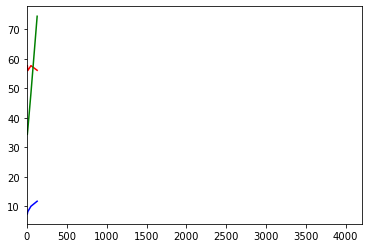

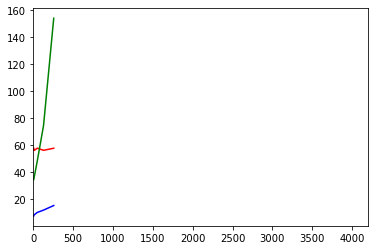

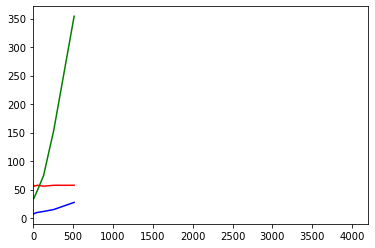

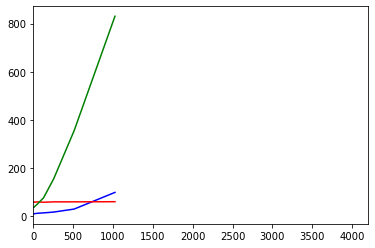

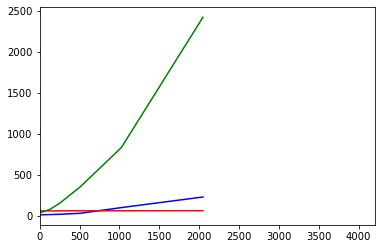

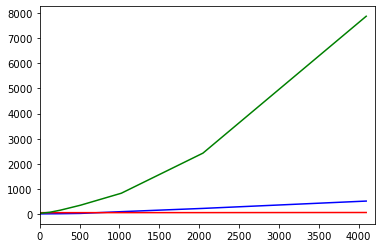

In [11]:
import matplotlib.pyplot as plt 

for i in range(4,10):
    plt.xlim(0,4200)
    plt.plot(mac_neurons[:i],times_mac[:i], 'b')
    plt.plot(frodo_neurons[:i], times_frodo[:i], 'r')
    plt.plot(pi_neurons[:i], times_pi[:i], 'g')
    plt.show()


## Animation

MovieWriter imagemagick unavailable; using Pillow instead.


done


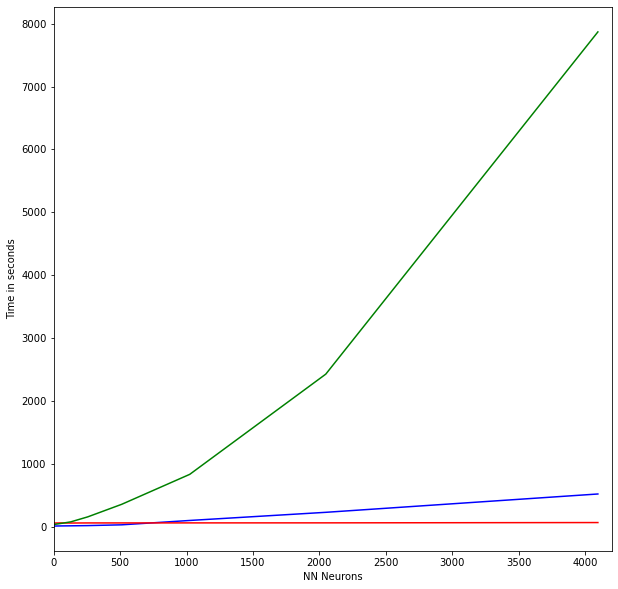

In [29]:
from matplotlib import pyplot as plt
from celluloid import Camera

fig = plt.figure(figsize=(10,10))
camera = Camera(fig)
plt.xlim(0,4200)
plt.xlabel('NN Neurons')
plt.ylabel('Time in seconds')
plt.plot(mac_neurons[3],times_mac[3], 'b', label = 'Mac')
plt.plot(frodo_neurons[3], times_frodo[3], 'r', label = 'GPU')
plt.plot(pi_neurons[3], times_pi[3], 'g', label = 'RaspPi')
for i in range(4,10):
    plt.plot(mac_neurons[:i],times_mac[:i], 'b')#, label = 'Mac')
    plt.plot(frodo_neurons[:i], times_frodo[:i], 'r')#, label = 'GPU')
    plt.plot(pi_neurons[:i], times_pi[:i], 'g')#, label = 'RaspPi')
    camera.snap()
animation = camera.animate(interval = 1000)
print("done")
animation.save('timecomparison.gif', writer = 'imagemagick')